No spin-information entered, assuming no spin-degree of freedom in the following. See build_lib.py for details if spin is desired.
 Index | Atom | Label | Spin |     Position     
    0  |   0  |32xy   |   0.5| 0.000,0.000,0.000
    1  |   0  |32yz   |   0.5| 0.000,0.000,0.000
    2  |   0  |32xz   |   0.5| 0.000,0.000,0.000
    3  |   0  |32ZR   |   0.5| 0.000,0.000,0.000
    4  |   0  |32XY   |   0.5| 0.000,0.000,0.000
    5  |   1  |32xy   |   0.5| 4.000,0.000,0.000
    6  |   1  |32yz   |   0.5| 4.000,0.000,0.000
    7  |   1  |32xz   |   0.5| 4.000,0.000,0.000
    8  |   1  |32ZR   |   0.5| 4.000,0.000,0.000
    9  |   1  |32XY   |   0.5| 4.000,0.000,0.000
   10  |   2  |32xy   |   0.5| 2.000,3.464,0.000
   11  |   2  |32yz   |   0.5| 2.000,3.464,0.000
   12  |   2  |32xz   |   0.5| 2.000,3.464,0.000
   13  |   2  |32ZR   |   0.5| 2.000,3.464,0.000
   14  |   2  |32XY   |   0.5| 2.000,3.464,0.000


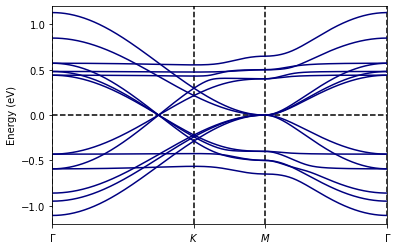

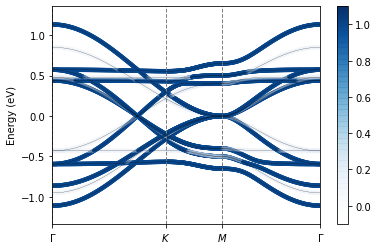

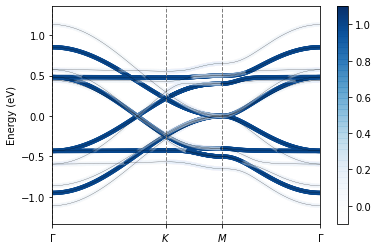

In [23]:
import numpy as np
import chinook.build_lib as build_lib
import chinook.operator_library as operators
from chinook.ARPES_lib import experiment

# Step 1. Set up the basis dictionary
a,c = 8.0,12.0
avec = np.array([[a,0,0],[a/2,a*np.sqrt(3)/2,0],[0,0,c]])

Z_A = np.array([0.0,0.0,0.0])
Z_B = np.array([a/2,0.0,0.0])
Z_C = np.array([a/4,a*np.sqrt(3)/4,0.0])

basis = {'atoms':[0,1,2], 
'Z':{0:26,1:26,2:26},    
'orbs':[['32xy','32yz','32xz','32ZR','32XY'],['32xy','32yz','32xz','32ZR','32XY'],
        ['32xy','32yz','32xz','32ZR','32XY']],
'pos':[Z_A,Z_B,Z_C]}

basis_object = build_lib.gen_basis(basis)

# Step 2. Define k-path
kpoints = np.array([[0.0,0.0,0.0],[2/3,1/3,0.0],[0.5,0.0,0.0],[0.0,0.0,0.0]])
labels = np.array(['$\\Gamma$','$K$','$M$','$\\Gamma$'])



kdict = {'type':'F',
'avec':avec,
'pts':kpoints,
'grain':200,
'labels':labels}

k_object = build_lib.gen_K(kdict)

# Step 3. Set up the Hamiltonian dictionary
E_A = 0
E_B = 0
E_C = 0

t_ddS = -0.325
t_ddP = 0.25
t_ddD = -0.2

VSK = {'032':E_A,'132':E_B,'232':E_C,'013322S':t_ddS,'013322P':t_ddP,'013322D':t_ddD,
       '023322S':t_ddS,'023322P':t_ddP,'023322D':t_ddD,
       '123322S':t_ddS,'123322P':t_ddP,'123322D':t_ddD}

cutoff = 0.51 * a

hamiltonian = {'type':'SK',    
              'V':VSK,          
              'avec':avec,    
              'cutoff':cutoff, 
              'renorm':1.0,     
              'offset':0.0,   
              'tol':1e-4} 

TB = build_lib.gen_TB(basis_object,hamiltonian,k_object)

TB.Kobj = k_object
TB.solve_H()
TB.plotting(win_min=-1.2,win_max=1.2)

TB.print_basis_summary()
sigma_bands = operators.fatbs(proj=[0,3,4,5,8,9,10,13,14],TB=TB,degen=False)
pi_bands = operators.fatbs(proj=[1,2,6,7,11,12],TB=TB,degen=False)

Initiate diagonalization: 
Large memory load: splitting diagonalization into 3 segments
Diagonalization Complete.
Begin computing matrix elements: 
||||||||||||||||||||||||||||||100%
Done matrix elements


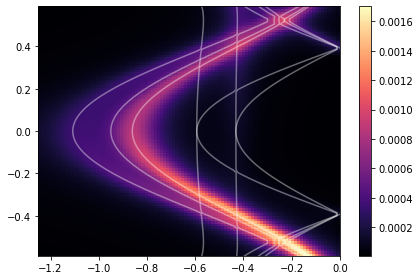

In [24]:
# Step 4. Set up ARPES dictionary
k_bound = np.pi/a

arpes = {'cube':{'X':[-1.5 * k_bound,1.5 * k_bound,100],'Y':[-k_bound,k_bound,100],'E':[-1.25,0.0,100],'kz':0.0}, 
         'hv':80,                          
         'T':10,                     
         'pol':np.array([1,0,-1]),           
         'SE':['poly',0.05,0,0.05],            
         'resolution':{'E':0.03,'k':0.01}}

arpes_experiment = experiment(TB,arpes) #initialize experiment object
arpes_experiment.datacube()
_ = arpes_experiment.spectral(slice_select=('y',0),plot_bands=True)

Initiate diagonalization: 
Large memory load: splitting diagonalization into 4 segments
Diagonalization Complete.
Begin computing matrix elements: 
||||||||||||||||||||||||||||||100%
Done matrix elements


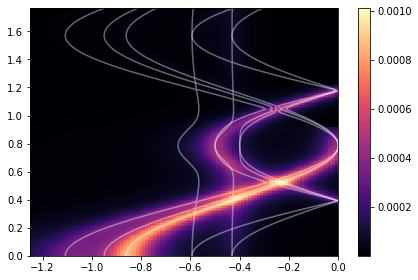

In [28]:
# Step 4. Set up ARPES dictionary
k_bound = np.pi/a

arpes = {'cube':{'X':[0,4.5*k_bound,150],'Y':[-k_bound,k_bound,100],'E':[-1.25,0.0,100],'kz':0.0}, 
         'hv':80,                          
         'T':10,                     
         'pol':np.array([1,0,-1]),           
         'SE':['poly',0.05,0,0.05],            
         'resolution':{'E':0.03,'k':0.01}}

arpes_experiment = experiment(TB,arpes) #initialize experiment object
arpes_experiment.datacube()
_ = arpes_experiment.spectral(slice_select=('y',0),plot_bands=True)

Initiate diagonalization: 
Large memory load: splitting diagonalization into 11 segments
Diagonalization Complete.
Begin computing matrix elements: 
||||||||||||||||||||||||||||||100%
Done matrix elements


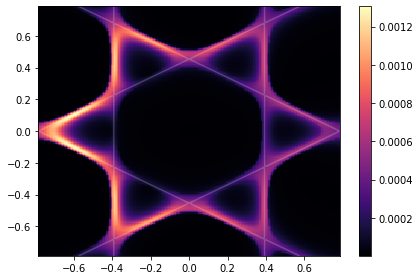

In [22]:
arpes = {'cube':{'X':[-2.0*k_bound,2.0*k_bound,200],'Y':[-2.0 * k_bound,2.0 * k_bound,200],'E':[-1.25,0.0,200],'kz':0.0}, 
         'hv':80,                          
         'T':10,                     
         'pol':np.array([1,0,-1]),           
         'SE':['poly',0.05,0,0.05],            
         'resolution':{'E':0.03,'k':0.01}}
arpes_experiment = experiment(TB,arpes) #initialize experiment object
arpes_experiment.datacube()
_ = arpes_experiment.spectral(slice_select=('w',0),plot_bands=True)

In [12]:
from chinook.ARPES_lib import poly

w = np.linspace(-1.25,0,100)
SE_args = arpes['SE']
SE =  -1.0j*abs(poly(w,SE_args[1:]))
print(SE)

[0.-0.020625j   0.-0.02031094j 0.-0.02000006j 0.-0.01969238j
 0.-0.01938788j 0.-0.01908657j 0.-0.01878845j 0.-0.01849352j
 0.-0.01820178j 0.-0.01791322j 0.-0.01762786j 0.-0.01734568j
 0.-0.01706669j 0.-0.01679089j 0.-0.01651828j 0.-0.01624885j
 0.-0.01598262j 0.-0.01571957j 0.-0.01545971j 0.-0.01520304j
 0.-0.01494956j 0.-0.01469927j 0.-0.01445216j 0.-0.01420824j
 0.-0.01396752j 0.-0.01372998j 0.-0.01349563j 0.-0.01326446j
 0.-0.01303649j 0.-0.0128117j  0.-0.01259011j 0.-0.0123717j
 0.-0.01215648j 0.-0.01194444j 0.-0.0117356j  0.-0.01152995j
 0.-0.01132748j 0.-0.0111282j  0.-0.01093211j 0.-0.01073921j
 0.-0.0105495j  0.-0.01036297j 0.-0.01017964j 0.-0.00999949j
 0.-0.00982253j 0.-0.00964876j 0.-0.00947818j 0.-0.00931078j
 0.-0.00914658j 0.-0.00898556j 0.-0.00882773j 0.-0.00867309j
 0.-0.00852164j 0.-0.00837338j 0.-0.00822831j 0.-0.00808642j
 0.-0.00794772j 0.-0.00781221j 0.-0.00767989j 0.-0.00755076j
 0.-0.00742482j 0.-0.00730206j 0.-0.00718249j 0.-0.00706612j
 0.-0.00695293j 0.-0.0068

No spin-information entered, assuming no spin-degree of freedom in the following. See build_lib.py for details if spin is desired.


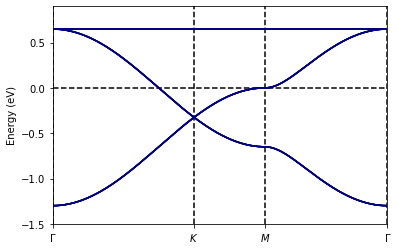

In [16]:
# Step 1. Set up the basis dictionary
a,c = 8.0,12.0
avec = np.array([[a,0,0],[a/2,a*np.sqrt(3)/2,0],[0,0,c]])

Z_A = np.array([0.0,0.0,0.0])
Z_B = np.array([a/2,0.0,0.0])
Z_C = np.array([a/4,a*np.sqrt(3)/4,0.0])

basis = {'atoms':[0,1,2], 
'Z':{0:26,1:26,2:26},    
'orbs':[['32xy','32yz','32xz','32ZR','32XY'],['32xy','32yz','32xz','32ZR','32XY'],
        ['32xy','32yz','32xz','32ZR','32XY']],
'pos':[Z_A,Z_B,Z_C]}

basis_object = build_lib.gen_basis(basis)

# Step 2. Define k-path
kpoints = np.array([[0.0,0.0,0.0],[2/3,1/3,0.0],[0.5,0.0,0.0],[0.0,0.0,0.0]])
labels = np.array(['$\\Gamma$','$K$','$M$','$\\Gamma$'])



kdict = {'type':'F',
'avec':avec,
'pts':kpoints,
'grain':200,
'labels':labels}

k_object = build_lib.gen_K(kdict)

# Step 3. Set up the Hamiltonian dictionary
E_A = 0
E_B = 0
E_C = 0

t_ddS = -0.325
t_ddP = -0.325
t_ddD = -0.325

VSK = {'032':E_A,'132':E_B,'232':E_C,'013322S':t_ddS,'013322P':t_ddP,'013322D':t_ddD,
       '023322S':t_ddS,'023322P':t_ddP,'023322D':t_ddD,
       '123322S':t_ddS,'123322P':t_ddP,'123322D':t_ddD}

cutoff = 0.51 * a

hamiltonian = {'type':'SK',    
              'V':VSK,          
              'avec':avec,    
              'cutoff':cutoff, 
              'renorm':1.0,     
              'offset':0.0,   
              'tol':1e-4} 

TB = build_lib.gen_TB(basis_object,hamiltonian,k_object)

TB.Kobj = k_object
TB.solve_H()
TB.plotting(win_min=-1.5,win_max=0.9)